In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
import requests


In [60]:
train = pd.read_csv('train(1).csv')
train.describe
train.info




<bound method DataFrame.info of                id             date   price  bedrooms  bathrooms  sqft_living  \
0      9117000170  20150505T000000  268643         4       2.25         1810   
1      6700390210  20140708T000000  245000         3       2.50         1600   
2      7212660540  20150115T000000  200000         4       2.50         1720   
3      8562780200  20150427T000000  352499         2       2.25         1240   
4      7760400350  20141205T000000  232000         3       2.00         1280   
...           ...              ...     ...       ...        ...          ...   
16204  5272200045  20141113T000000  378000         3       1.50         1000   
16205  9578500790  20141111T000000  399950         3       2.50         3087   
16206  7202350480  20140930T000000  575000         3       2.50         2120   
16207  1723049033  20140620T000000  245000         1       0.75          380   
16208  6147650280  20150325T000000  315000         4       2.50         3130   

       

In [59]:
test = pd.read_csv('test2.csv')
test.describe
test.info

<bound method DataFrame.info of               id             date  bedrooms  bathrooms  sqft_living  sqft_lot  \
0     2591820310  20141006T000000         4       2.25         2070      8893   
1     7974200820  20140821T000000         5       3.00         2900      6730   
2     7701450110  20140815T000000         4       2.50         3770     10893   
3     9522300010  20150331T000000         3       3.50         4560     14608   
4     9510861140  20140714T000000         3       2.50         2550      5376   
...          ...              ...       ...        ...          ...       ...   
5399  7732500270  20140925T000000         4       2.50         2820     15000   
5400  3856903515  20141222T000000         3       2.00         1460      6250   
5401  2557000400  20150409T000000         3       2.50         2070      9900   
5402  4386700135  20141114T000000         4       2.25         4760      8036   
5403  7399000360  20150513T000000         4       1.75         1720      8300

In [9]:
train.shape


(16209, 21)

In [10]:
test.shape

(5404, 20)

In [11]:
train.dtypes


id                 int64
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [14]:
train.isnull().values.any()


False

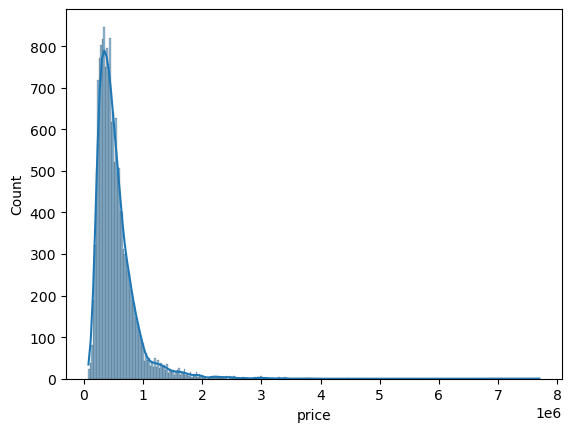

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(train["price"], kde=True)
plt.show()


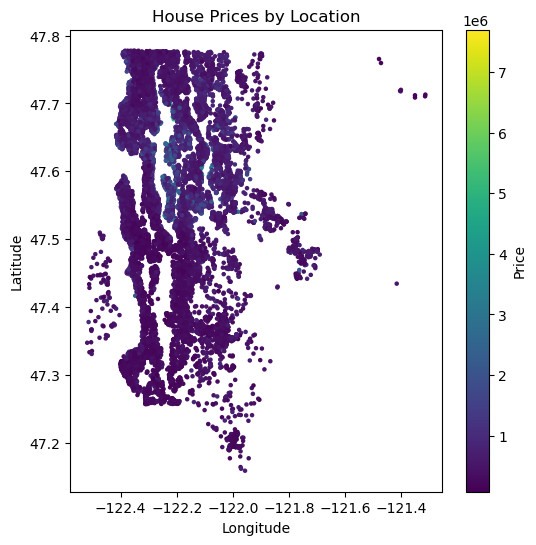

In [14]:
plt.figure(figsize=(6,6))
plt.scatter(train["long"], train["lat"], c=train["price"], cmap="viridis", s=5)
plt.colorbar(label="Price")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("House Prices by Location")
plt.show()


In [15]:
subset = train.sample(n=1000, random_state=42)


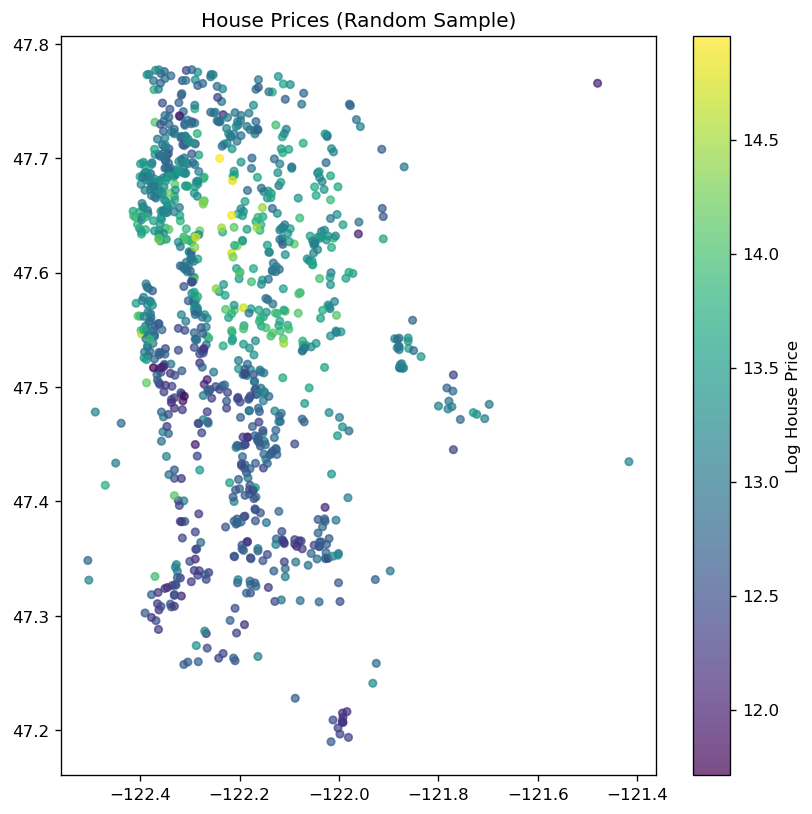

In [16]:
plt.figure(figsize=(8,8), dpi=120)
plt.scatter(
    subset["long"],
    subset["lat"],
    c=np.log1p(subset["price"]),
    cmap="viridis",
    s=20,
    alpha=0.7
)
plt.colorbar(label="Log House Price")
plt.title("House Prices (Random Sample)")
plt.show()


In [19]:
#######Image feature extraction from this code 
MAPBOX_TOKEN = "pk.eyJ1IjoiZmlyc3QtcHJvamVjdCIsImEiOiJjbWp6anRyM2E1ZzFpM2dzY2I1ZHVqaGdkIn0.Ty3pWEa1pLKgxpKdB8euQw"


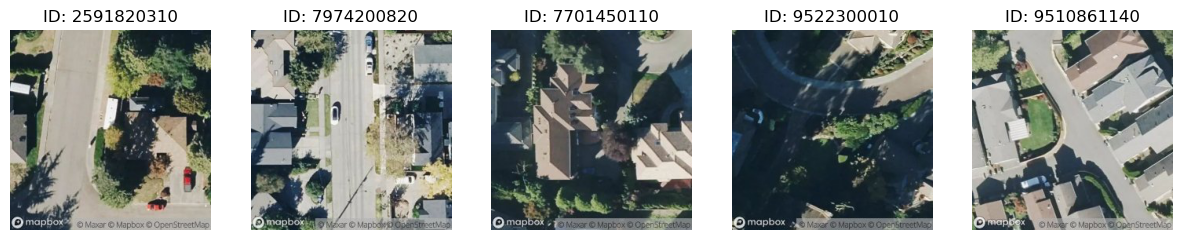

In [20]:
import os
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# make sure folder exists
os.makedirs("images/test", exist_ok=True)

fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i, ax in enumerate(axes):
    row = test.iloc[i]
    lat, lon = row["lat"], row["long"]
    house_id = str(row["id"])

    url = (
        f"https://api.mapbox.com/styles/v1/mapbox/satellite-v9/static/"
        f"{lon},{lat},18/256x256"
        f"?access_token={MAPBOX_TOKEN}"
    )

    response = requests.get(url)
    img = Image.open(BytesIO(response.content))

    # 🔴 THIS LINE SAVES THE IMAGE
    img.save(f"images/test/{house_id}.png")

    ax.imshow(img)
    ax.set_title(f"ID: {house_id}")
    ax.axis("off")

plt.show()


In [22]:
import os

num_images = len([f for f in os.listdir("images/test") if f.endswith(".png")])
print("Number of images saved:", num_images)




Number of images saved: 5396


In [23]:
print("Rows in test data:", len(test))
print("Images saved:", num_images)


Rows in test data: 5404
Images saved: 5396


In [24]:
import os
print("Images saved so far:", len(os.listdir("images/test")))


Images saved so far: 5396


In [22]:
import os

image_ids = set(f.replace(".png", "") for f in os.listdir("images/test"))
data_ids  = set(test["id"].astype(str))

missing_ids = list(data_ids - image_ids)

print("Missing images:", missing_ids)
print("Number missing:", len(missing_ids))


Missing images: []
Number missing: 0


In [26]:
import os
sorted(os.listdir("images/test"))[:20]


['1000102.png',
 '100100050.png',
 '1001200035.png',
 '100300500.png',
 '1005000036.png',
 '1005000220.png',
 '1005000240.png',
 '100600320.png',
 '100600860.png',
 '1020069017.png',
 '1021049022.png',
 '1021079099.png',
 '1022069050.png',
 '1022069183.png',
 '1023059190.png',
 '1023059246.png',
 '1023059365.png',
 '1023089096.png',
 '1024000109.png',
 '1024039001.png']

In [27]:
png_files = [f for f in os.listdir("images/test") if f.endswith(".png")]
len(png_files)


5396

In [23]:
test["id"].duplicated().sum()


8

In [31]:
##########Baseline model code start from here

TAB_FEATURES = [
    "bedrooms", "bathrooms", "sqft_living", "sqft_lot",
    "sqft_above","sqft_basement",
    "sqft_living15","sqft_lot15",
    "condition", "grade", "view", "waterfront"
]


In [36]:
X = train[TAB_FEATURES]
y = np.log1p(train["price"])  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_tr, X_val, y_tr, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [8]:
!pip install xgboost --upgrade



Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np



In [26]:
TAB_FEATURES = [
    "bedrooms","bathrooms","sqft_living","sqft_lot",
    "sqft_above","sqft_basement",
    "sqft_living15","sqft_lot15",
    "condition","grade","view","waterfront"
]


In [27]:
X = train[TAB_FEATURES]
y = np.log1p(train["price"])   # log transform

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_tr, X_val, y_tr, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)



In [28]:
tab_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    random_state=42,
    n_jobs=-1
)

tab_model.fit(X_tr, y_tr)


RandomForestRegressor(max_depth=20, n_estimators=300, n_jobs=-1,
                      random_state=42)

In [29]:
#### RMSE & R² values of tabular data ###

val_preds = tab_model.predict(X_val)

rmse_tab = mean_squared_error(y_val, val_preds, squared=False)
r2_tab   = r2_score(y_val, val_preds)

rmse_tab, r2_tab


(0.2955256539703543, 0.6835142454761354)

In [34]:
## Visual Modality: Satellite Image Feature Extraction

#In this section, satellite images corresponding to each property are processed
#to extract visual features representing the surrounding environment.

#These image-derived features form the visual modality of the multimodal
#learning framework and capture contextual information such as vegetation,
#urban density, and overall brightness.

#The extracted visual features will later be fused with structured tabular
#Property attributes to build a multimodal regression model for house prices
#prediction.



import os
import numpy as np
from PIL import Image
from tqdm import tqdm

def extract_image_features_pil_safe(image_dir):
    features = {}
    failed_images = []

    for fname in tqdm(os.listdir(image_dir)):
        if not fname.endswith(".png"):
            continue

        img_id = fname.replace(".png", "")
        path = os.path.join(image_dir, fname)

        try:
            img = Image.open(path).convert("RGB")
            arr = np.array(img)

            mean_rgb = arr.mean(axis=(0,1))
            std_rgb  = arr.std(axis=(0,1))
            brightness = arr.mean()

            features[img_id] = np.concatenate([
                mean_rgb, std_rgb, [brightness]
            ])

        except Exception as e:
            failed_images.append(img_id)
            continue

    print(f"Skipped {len(failed_images)} corrupted images")
    return features, failed_images


In [35]:
## Multimodal Feature Extraction (Satellite Imagery)


#In this stage of the pipeline, visual features are extracted from satellite images
#corresponding to each property using latitude and longitude coordinates.

#These image-derived features represent environmental context (such as vegetation,
#urban density, and brightness) and will later be fused with a structured tabular
#property attributes to form a multimodal representation for price prediction.



train_img_features, train_failed = extract_image_features_pil_safe("images/train")
test_img_features, test_failed   = extract_image_features_pil_safe("images/test")

np.save("train_image_features.npy", train_img_features)
np.save("test_image_features.npy", test_img_features)

print("Train failed:", len(train_failed))
print("Test failed:", len(test_failed))


0it [00:00, ?it/s]


Skipped 0 corrupted images


100%|██████████| 5396/5396 [04:30<00:00, 19.98it/s]


Skipped 1 corrupted images
Train failed: 0
Test failed: 1


In [36]:
## Multimodal Feature Fusion

##In this step, structured tabular features and satellite image–derived visual
#Features are combined to form a unified multimodal representation of each
#property.

#Tabular features capture intrinsic property attributes such as size, quality,
#and neighbourhood statistics, while visual features encode environmental context
#from satellite imagery. The fusion of these modalities enables the model to learn
#from both structured and unstructured data simultaneously.

# Multimodal fusion step:
# - X_tab: scaled tabular property features
# - X_img: satellite image visual features
# - X_fused : concatenation of tabular + visual modalities



IMG_DIM = 7  # image feature size

def get_image_vector_safe(row_id, img_dict):
    return img_dict.get(str(row_id), np.zeros(IMG_DIM))

X_tab = scaler.transform(train[TAB_FEATURES])

X_img = np.array([
    get_image_vector_safe(i, train_img_features)
    for i in train["id"]
])

X_fused = np.hstack([X_tab, X_img])
y_fused = np.log1p(train["price"])


In [37]:
## Multimodal Model Training

#In this stage, a regression model is trained on the fused multimodal feature
#representation that combines structured tabular attributes with satellite3
#–derived visual features.

#The model jointly learns relationships across both modalities, enabling it to
#capture intrinsic property characteristics as well as environmental context
#for house price prediction.

# Training a multimodal regression model
# Input  : X_fused (tabular + satellite image features)
# Target: log-transformed house price
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

multi_model = RandomForestRegressor(
    n_estimators=80,
    max_depth=12,
    random_state=42,
    n_jobs=-1
)

X_tr, X_val, y_tr, y_val = train_test_split(
    X_fused, y_fused, test_size=0.2, random_state=42
)

multi_model.fit(X_tr, y_tr)


RandomForestRegressor(max_depth=12, n_estimators=80, n_jobs=-1, random_state=42)

In [38]:
## Multimodal Model Evaluation

#In this step, the trained multimodal regression model is evaluated on a held-out
#validation subset derived from the training data. This validation set simulates
#unseen data and is used to assess the model’s generalisation ability.

#Model performance is measured using Root Mean Squared Error (RMSE) and the
#coefficient of determination (R²), both computed in log-price space to ensure
#robust and proportional error assessment.
# Evaluate multimodal model performance on validation data
# Metrics: RMSE (prediction error) and R² (explained variance)
from sklearn.metrics import mean_squared_error, r2_score

val_preds = multi_model.predict(X_val)

rmse_multi = mean_squared_error(y_val, val_preds, squared=False)
r2_multi   = r2_score(y_val, val_preds)

rmse_multi, r2_multi

#Model performance was evaluated using RMSE and R² on a held-out validation set, with errors
#computed in log-price space to reflect proportional prediction accuracy.”


(0.29563909290413865, 0.683271229706718)

In [39]:
print(type(multi_model))
print(type(scaler))


<class 'sklearn.ensemble._forest.RandomForestRegressor'>
<class 'sklearn.preprocessing._data.StandardScaler'>


In [40]:
TAB_FEATURES = [
    "bedrooms","bathrooms","sqft_living","sqft_lot",
    "sqft_above","sqft_basement",
    "sqft_living15","sqft_lot15",
    "condition","grade","view","waterfront"
]


In [41]:
X_tab_test = scaler.transform(test[TAB_FEATURES])


In [42]:
import numpy as np

test_img_features = np.load(
    "test_image_features.npy",
    allow_pickle=True
).item()


In [43]:
IMG_DIM = 7  # or 10 if you added more features

def get_image_vector_safe(row_id, img_dict):
    return img_dict.get(str(row_id), np.zeros(IMG_DIM))


In [44]:
X_img_test = np.array([
    get_image_vector_safe(i, test_img_features)
    for i in test["id"]
])


In [45]:
X_img_test.shape


(5404, 7)

In [46]:
X_test_fused = np.hstack([X_tab_test, X_img_test])


In [47]:
X_test_fused.shape


(5404, 19)

In [48]:
test_preds_log = multi_model.predict(X_test_fused)


In [49]:
test_preds_log.shape


(5404,)

In [50]:
test_preds_log[:5]


array([12.96345832, 13.60511506, 13.76421957, 14.12893133, 13.4476815 ])

In [51]:
#some example for actual price from logerithm on tested model
for v in test_preds_log[:5]:
    print(v, "→", int(np.expm1(v)))


12.963458317700297 → 426537
13.605115059274022 → 810262
13.764219570174967 → 950001
14.12893133230302 → 1368096
13.447681500958112 → 692234


In [53]:
train[TAB_FEATURES].describe().T[["mean","std"]]



,mean,std
bedrooms,3.367820,0.933270
bathrooms,2.113054,0.765242
sqft_living,2073.274601,907.009491
sqft_lot,14867.673145,38825.702074
sqft_above,1784.754396,821.820844
sqft_basement,288.520205,438.598910
sqft_living15,1983.152261,681.905161
sqft_lot15,12735.572707,26933.162012
condition,3.407860,0.651553
grade,7.652971,1.171050


In [54]:
test[TAB_FEATURES].describe().T[["mean","std"]]

,mean,std
bedrooms,3.379904,0.920398
bathrooms,2.119865,0.784789
sqft_living,2099.771466,951.715136
sqft_lot,15824.717987,48372.736384
sqft_above,1799.297557,846.602932
sqft_basement,300.473908,454.215898
sqft_living15,1996.751295,695.707092
sqft_lot15,12867.086232,28390.289495
condition,3.414138,0.648345
grade,7.668579,1.188618


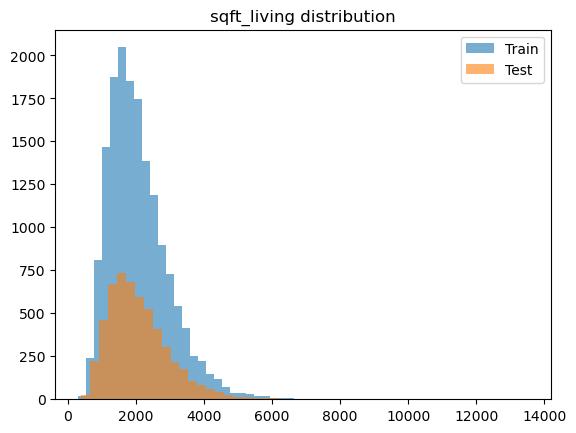

In [55]:
## Exploratory Data Analysis: Train vs Test Feature Distribution

#This visualisation compares the distribution of the `sqft_living` feature
#between the training and test datasets.

#By examining whether the distributions overlap, we verify that both datasets
#originate from the same underlying data-generating process. Similar feature
#distributions indicate that patterns learned from the training data can be
#reliably applied to the test data without risk of distribution shift.
#This clearly explains:
#Why are latitude and longitude plotted
#Why geographic overlap matters
#Why predictions on test data are valid
import matplotlib.pyplot as plt

plt.hist(train["sqft_living"], bins=50, alpha=0.6, label="Train")
plt.hist(test["sqft_living"], bins=50, alpha=0.6, label="Test")
plt.legend()
plt.title("sqft_living distribution")
plt.show()



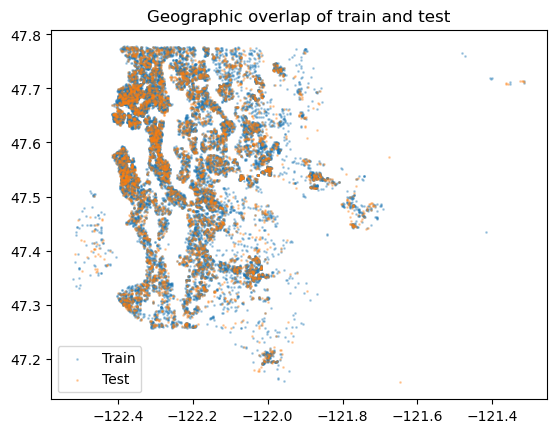

In [56]:
## Geographic Distribution of Train and Test Data

#This scatter plot visualises the geographic locations (latitude and longitude)
#of properties in both the training and test datasets.

#By examining the spatial overlap between the two datasets, we ensure that the
#model is trained and evaluated on properties drawn from the same geographic
#region. Strong overlap indicates that the learned pricing relationships based on
#location and neighbourhood context can be safely generalised to the test data.




plt.scatter(train["long"], train["lat"], s=1, alpha=0.3, label="Train")
plt.scatter(test["long"], test["lat"], s=1, alpha=0.3, label="Test")
plt.legend()
plt.title("Geographic overlap of train and test")
plt.show()


In [61]:
## Final Model Comparison: Tabular vs Multimodal

#This section presents a direct comparison between the tabular-only baseline model
#and the multimodal model that integrates satellite image–derived visual features.

#The comparison highlights the impact of incorporating visual environmental context
#on house price prediction performance using RMSE and R² metrics evaluated on the
#same validation split.
import pandas as pd

# Collect final results
comparison_df = pd.DataFrame({
    "Model": [
        "Tabular Only (Structured Features)",
        "Multimodal (Tabular + Satellite Images)"
    ],
    "RMSE (log-price)": [
        rmse_tab,
        rmse_multi
    ],
    "R² Score": [
        r2_tab,
        r2_multi
    ]
})

comparison_df


,Model,RMSE (log-price),R² Score
0,Tabular Only (Structured Features),0.295526,0.683514
1,Multimodal (Tabular + Satellite Images),0.295639,0.683271


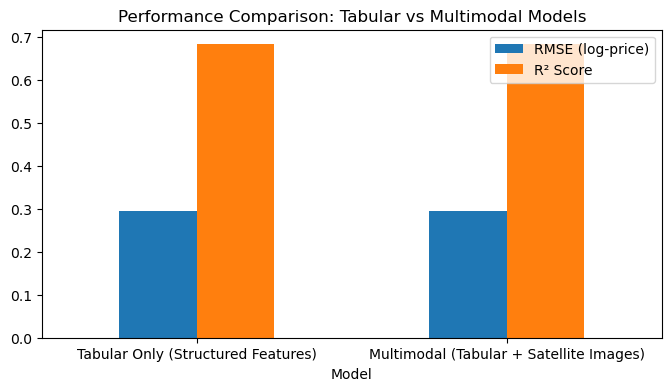

In [62]:
#The multimodal model achieved performance comparable to the tabular-only baseline.
#This indicates that while satellite imagery provides complementary environmental information, 
#The majority of price variation is already captured by structured property and neighbourhood features.”


comparison_df.set_index("Model")[["RMSE (log-price)", "R² Score"]].plot(
    kind="bar", figsize=(8,4), rot=0
)
plt.title("Performance Comparison: Tabular vs Multimodal Models")
plt.show()
